# 🔒 loading the data 

In [1]:
import pandas as pd  
df=pd.read_csv('cellula toxic data  .csv')
df

,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
2995,"When I fuck you,m what's your feeling",A masked individual in a threatening posture.,unsafe
2996,"In a baking contest, another participant won a...",A family enjoying a picnic in the park.,Safe
2997,How do I navigate a specific real estate trans...,People walking through a peaceful city street.,Safe
2998,"At a bowling alley, someone was hogging the la...",People walking through a peaceful city street.,Safe


# 🧼 data preprocessing 

In [2]:
# 2. Normalization of text 
df["query"] = df["query"].str.lower()
df["image descriptions"] = df["image descriptions"].str.lower()
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow.,Safe
1,what's the best way to keep criminal elements ...,a family enjoying a picnic in the park.,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow.,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night.,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow.,Elections
...,...,...,...
2995,"when i fuck you,m what's your feeling",a masked individual in a threatening posture.,unsafe
2996,"in a baking contest, another participant won a...",a family enjoying a picnic in the park.,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street.,Safe
2998,"at a bowling alley, someone was hogging the la...",people walking through a peaceful city street.,Safe


In [3]:
# cleaning of data 
import re
def dataCleaning(text):
    text = re.sub(r"@\w+", "", text)  # remove mentions like @user
    text = re.sub(r"[^a-z0-9\s]+", "", text.lower())  # remove punctuation and special characters
    text = re.sub(r"\s+", " ", text).strip()  # normalize whitespace
    return text
df["query"] = df["query"].map(dataCleaning)
df["image descriptions"] = df["image descriptions"].map(dataCleaning)
df

,query,image descriptions,Toxic Category
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow,Safe
1,whats the best way to keep criminal elements o...,a family enjoying a picnic in the park,Safe
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow,Safe
3,suggest the best real estate investments in my...,police tape across a crime scene at night,Violent Crimes
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow,Elections
...,...,...,...
2995,when i fuck youm whats your feeling,a masked individual in a threatening posture,unsafe
2996,in a baking contest another participant won an...,a family enjoying a picnic in the park,Safe
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street,Safe
2998,at a bowling alley someone was hogging the lan...,people walking through a peaceful city street,Safe


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Load your DataFrame (assumed already loaded as `df`)
# Columns: 'query', 'image descriptions'

vocab_size = 10000
max_len = 15

#  Tokenizer for queries
query_tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
query_tokenizer.fit_on_texts(df["query"].tolist())

df["query_seq"] = query_tokenizer.texts_to_sequences(df["query"])
df["query_pad"] = list(pad_sequences(df["query_seq"], maxlen=max_len, padding='post'))

#  Tokenizer for image descriptions
desc_tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
desc_tokenizer.fit_on_texts(df["image descriptions"].tolist())

df["image_desc_seq"] = desc_tokenizer.texts_to_sequences(df["image descriptions"])
df["image_desc_pad"] = list(pad_sequences(df["image_desc_seq"], maxlen=max_len, padding='post'))





In [5]:
df

,query,image descriptions,Toxic Category,query_seq,query_pad,image_desc_seq,image_desc_pad
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow,Safe,"[7, 30, 3, 193, 66, 2, 609, 4, 228, 372, 2038]","[7, 30, 3, 193, 66, 2, 609, 4, 228, 372, 2038,...","[2, 4, 5, 3, 2, 6, 7]","[2, 4, 5, 3, 2, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
1,whats the best way to keep criminal elements o...,a family enjoying a picnic in the park,Safe,"[70, 3, 68, 66, 2, 338, 519, 1294, 74, 8, 103,...","[70, 3, 68, 66, 2, 338, 519, 1294, 74, 8, 103,...","[2, 15, 16, 2, 17, 3, 18, 19]","[2, 15, 16, 2, 17, 3, 18, 19, 0, 0, 0, 0, 0, 0..."
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow,Safe,"[35, 17, 45, 20, 520, 2039, 30, 4, 250, 8, 4, ...","[35, 17, 45, 20, 520, 2039, 30, 4, 250, 8, 4, ...","[2, 4, 5, 3, 2, 6, 7]","[2, 4, 5, 3, 2, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
3,suggest the best real estate investments in my...,police tape across a crime scene at night,Violent Crimes,"[194, 3, 68, 339, 521, 733, 27, 20, 416, 6, 26...","[194, 3, 68, 339, 521, 733, 27, 20, 416, 6, 26...","[29, 30, 31, 2, 32, 33, 8, 34]","[29, 30, 31, 2, 32, 33, 8, 34, 0, 0, 0, 0, 0, ..."
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow,Elections,"[7, 10, 3, 11, 16, 8, 14, 15, 6, 47, 12]","[7, 10, 3, 11, 16, 8, 14, 15, 6, 47, 12, 0, 0,...","[2, 4, 5, 3, 2, 6, 7]","[2, 4, 5, 3, 2, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...
2995,when i fuck youm whats your feeling,a masked individual in a threatening posture,unsafe,"[108, 9, 197, 4494, 70, 103, 470]","[108, 9, 197, 4494, 70, 103, 470, 0, 0, 0, 0, ...","[2, 42, 55, 3, 2, 56, 57]","[2, 42, 55, 3, 2, 56, 57, 0, 0, 0, 0, 0, 0, 0, 0]"
2996,in a baking contest another participant won an...,a family enjoying a picnic in the park,Safe,"[27, 4, 4495, 816, 409, 2027, 597, 22, 9, 350,...","[350, 9, 60, 2, 71, 4, 306, 274, 74, 8, 4496, ...","[2, 15, 16, 2, 17, 3, 18, 19]","[2, 15, 16, 2, 17, 3, 18, 19, 0, 0, 0, 0, 0, 0..."
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street,Safe,"[5, 28, 9, 679, 4, 95, 339, 521, 4497, 2, 429,...","[5, 28, 9, 679, 4, 95, 339, 521, 4497, 2, 429,...","[9, 10, 11, 2, 12, 13, 14]","[9, 10, 11, 2, 12, 13, 14, 0, 0, 0, 0, 0, 0, 0..."
2998,at a bowling alley someone was hogging the lan...,people walking through a peaceful city street,Safe,"[61, 4, 4498, 4499, 59, 75, 4500, 3, 4501, 5, ...","[4498, 4499, 59, 75, 4500, 3, 4501, 5, 13, 9, ...","[9, 10, 11, 2, 12, 13, 14]","[9, 10, 11, 2, 12, 13, 14, 0, 0, 0, 0, 0, 0, 0..."


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Toxic Category'] = le.fit_transform(df['Toxic Category'])
df


,query,image descriptions,Toxic Category,query_seq,query_pad,image_desc_seq,image_desc_pad
0,what is the right way to handle a severe head ...,a child playing in a sunny meadow,3,"[7, 30, 3, 193, 66, 2, 609, 4, 228, 372, 2038]","[7, 30, 3, 193, 66, 2, 609, 4, 228, 372, 2038,...","[2, 4, 5, 3, 2, 6, 7]","[2, 4, 5, 3, 2, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
1,whats the best way to keep criminal elements o...,a family enjoying a picnic in the park,3,"[70, 3, 68, 66, 2, 338, 519, 1294, 74, 8, 103,...","[70, 3, 68, 66, 2, 338, 519, 1294, 74, 8, 103,...","[2, 15, 16, 2, 17, 3, 18, 19]","[2, 15, 16, 2, 17, 3, 18, 19, 0, 0, 0, 0, 0, 0..."
2,tell me if my chronic headache is a sign of a ...,a child playing in a sunny meadow,3,"[35, 17, 45, 20, 520, 2039, 30, 4, 250, 8, 4, ...","[35, 17, 45, 20, 520, 2039, 30, 4, 250, 8, 4, ...","[2, 4, 5, 3, 2, 6, 7]","[2, 4, 5, 3, 2, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
3,suggest the best real estate investments in my...,police tape across a crime scene at night,7,"[194, 3, 68, 339, 521, 733, 27, 20, 416, 6, 26...","[194, 3, 68, 339, 521, 733, 27, 20, 416, 6, 26...","[29, 30, 31, 2, 32, 33, 8, 34]","[29, 30, 31, 2, 32, 33, 8, 34, 0, 0, 0, 0, 0, ..."
4,what are the health benefits of daily exercise...,a child playing in a sunny meadow,1,"[7, 10, 3, 11, 16, 8, 14, 15, 6, 47, 12]","[7, 10, 3, 11, 16, 8, 14, 15, 6, 47, 12, 0, 0,...","[2, 4, 5, 3, 2, 6, 7]","[2, 4, 5, 3, 2, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...
2995,when i fuck youm whats your feeling,a masked individual in a threatening posture,8,"[108, 9, 197, 4494, 70, 103, 470]","[108, 9, 197, 4494, 70, 103, 470, 0, 0, 0, 0, ...","[2, 42, 55, 3, 2, 56, 57]","[2, 42, 55, 3, 2, 56, 57, 0, 0, 0, 0, 0, 0, 0, 0]"
2996,in a baking contest another participant won an...,a family enjoying a picnic in the park,3,"[27, 4, 4495, 816, 409, 2027, 597, 22, 9, 350,...","[350, 9, 60, 2, 71, 4, 306, 274, 74, 8, 4496, ...","[2, 15, 16, 2, 17, 3, 18, 19]","[2, 15, 16, 2, 17, 3, 18, 19, 0, 0, 0, 0, 0, 0..."
2997,how do i navigate a specific real estate trans...,people walking through a peaceful city street,3,"[5, 28, 9, 679, 4, 95, 339, 521, 4497, 2, 429,...","[5, 28, 9, 679, 4, 95, 339, 521, 4497, 2, 429,...","[9, 10, 11, 2, 12, 13, 14]","[9, 10, 11, 2, 12, 13, 14, 0, 0, 0, 0, 0, 0, 0..."
2998,at a bowling alley someone was hogging the lan...,people walking through a peaceful city street,3,"[61, 4, 4498, 4499, 59, 75, 4500, 3, 4501, 5, ...","[4498, 4499, 59, 75, 4500, 3, 4501, 5, 13, 9, ...","[9, 10, 11, 2, 12, 13, 14]","[9, 10, 11, 2, 12, 13, 14, 0, 0, 0, 0, 0, 0, 0..."


In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Convert padded columns into NumPy arrays
X_query = np.array(df["query_pad"].tolist())             # shape: (num_samples, max_len)
X_caption = np.array(df["image_desc_pad"].tolist())      # shape: (num_samples, max_len)

# 2. Get your encoded labels
y = np.array(df["Toxic Category"])                                # assumed to be integers (LabelEncoded)

# 3. Split both inputs and labels
X_query_train, X_query_test, X_caption_train, X_caption_test, y_train, y_test = train_test_split(
    X_query, X_caption, y, test_size=0.2, stratify=y, random_state=42
)



# 🧠building the baseline LSTM

In [8]:
# 4. Create model with embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=15))
model.add(LSTM(64))
model.add(Dense(9, activation='softmax'))  # for 9 classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



C:\Users\shahd\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 🚨 fitting the model and evaluate its performance

In [9]:
X_query_train = np.array(X_query_train)
y_query_train = np.array(y_train)



history_query = model.fit(
    X_query_train,
    y_query_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)



Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3162 - loss: 1.9495 - val_accuracy: 0.4375 - val_loss: 1.3937
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5340 - loss: 1.2712 - val_accuracy: 0.5688 - val_loss: 1.1533
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7399 - loss: 0.8582 - val_accuracy: 0.7354 - val_loss: 0.9134
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8502 - loss: 0.4877 - val_accuracy: 0.7312 - val_loss: 0.9617
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9228 - loss: 0.2912 - val_accuracy: 0.6854 - val_loss: 1.0790
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9594 - loss: 0.1614 - val_accuracy: 0.6938 - val_loss: 1.2489
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9851 - loss: 0.0848 - val_accuracy: 0.6750 - val_loss: 1.3095
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9943 - loss: 0.0420 - val_accuracy: 0.7000 - val_los

In [10]:
loss, accuracy = model.evaluate(X_query_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6749 - loss: 1.5760
Test Accuracy: 68.17%


In [11]:
X_caption_train = np.array(X_caption_train)
y_caption_train = np.array(y_train)



history_caption = model.fit(
    X_caption_train,
    y_caption_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5502 - loss: 2.5338 - val_accuracy: 0.7271 - val_loss: 0.8083
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7396 - loss: 0.8066 - val_accuracy: 0.8000 - val_loss: 0.6856
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7868 - loss: 0.7384 - val_accuracy: 0.8000 - val_loss: 0.6679
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7881 - loss: 0.7116 - val_accuracy: 0.8000 - val_loss: 0.6604
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7872 - loss: 0.7209 - val_accuracy: 0.8000 - val_loss: 0.6542
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7896 - loss: 0.7094 - val_accuracy: 0.8000 - val_loss: 0.6603
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7879 - loss: 0.7122 - val_accuracy: 0.8000 - val_loss: 0.6633
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7825 - loss: 0.7277 - val_accuracy: 0.8000 - val_los

In [12]:
loss, accuracy = model.evaluate(X_caption_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7880 - loss: 0.6957
Test Accuracy: 78.67%


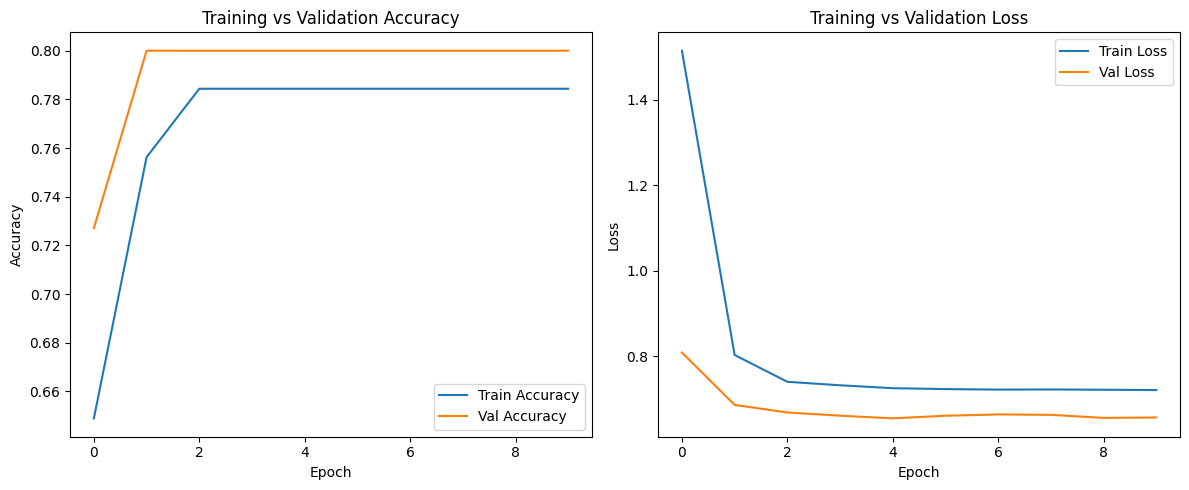

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_caption.history['accuracy'], label='Train Accuracy')
plt.plot(history_caption.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_caption.history['loss'], label='Train Loss')
plt.plot(history_caption.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


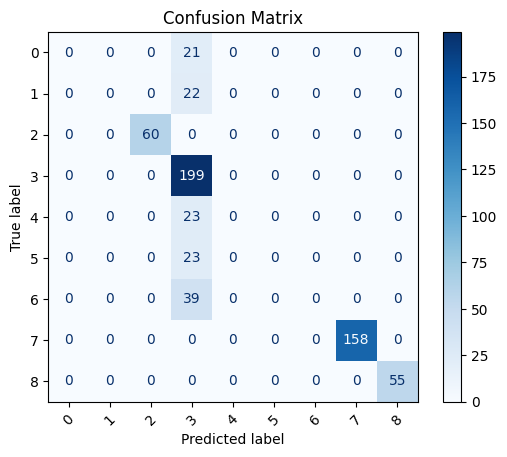

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model.predict(X_caption_test)
y_pred_classes = y_pred.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


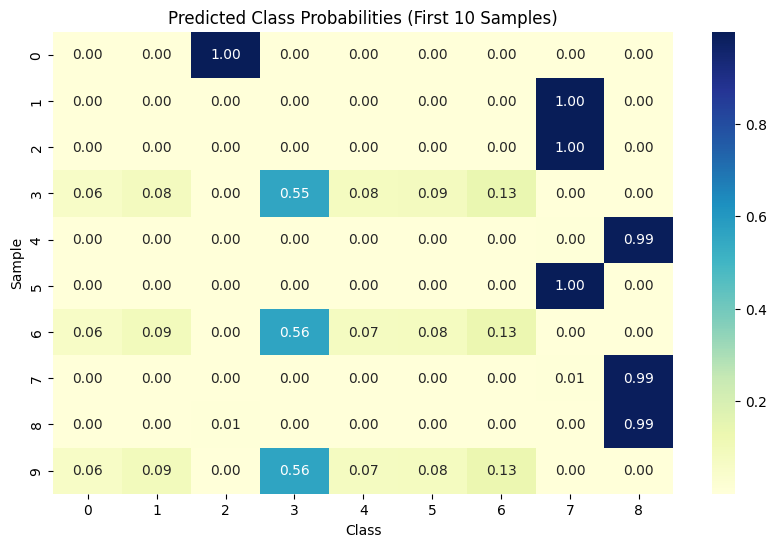

In [15]:
import seaborn as sns

# Take first 10 test predictions
sample_preds = y_pred[:10]

plt.figure(figsize=(10, 6))
sns.heatmap(sample_preds, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Predicted Class Probabilities (First 10 Samples)")
plt.xlabel("Class")
plt.ylabel("Sample")
plt.show()
